In [114]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
from lib.util import load_diabetes

import lib.ext.baycon.baycon.bayesian_generator as baycon
import lib.ext.baycon.baycon.bayesian_generator as baycon
import lib.ext.baycon.baycon.time_measurement as time_measurement
from lib.ext.baycon.common.DataAnalyzer import *
from lib.ext.baycon.common.Target import Target
from lib.ext.baycon.common.ScoreCalculator import ScoreCalculator
from lib.score_calculator_kmeans import ScoreCalculatorKmeans
from lib.score_calculator_model_agnostic import ScoreCalculatorModelAgnostic

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: >

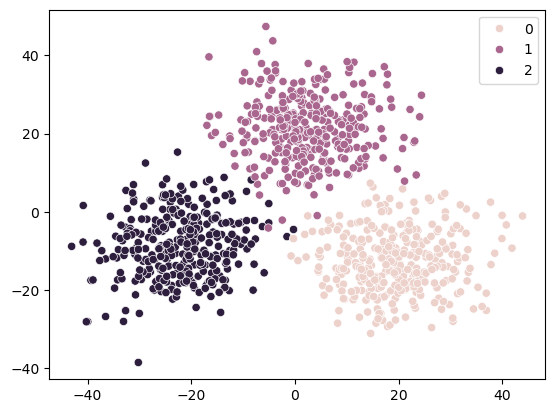

In [115]:
k = 3
# X, y = make_blobs(centers=k, cluster_std=1.5, n_features=2, n_samples=1000, random_state=49)
X, y = make_blobs(centers=k, cluster_std=8, n_features=20, n_samples=1000, random_state=49)
# X,y = load_diabetes()

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
# embed_X = X
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

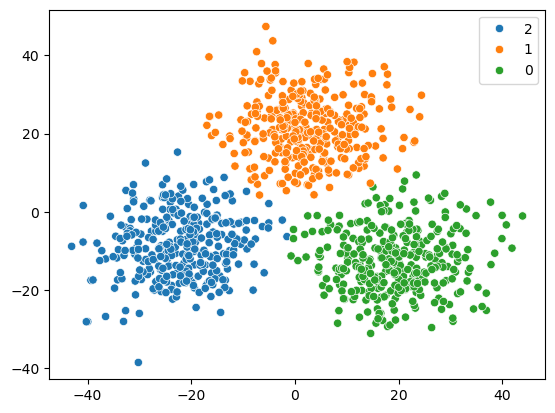

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,label
0,-0.633592,-0.466277,15.090658,-7.626279,-1.473531,14.021256,14.894936,4.557144,-8.365634,-12.732880,...,4.341540,0.687347,-11.280070,6.390890,-5.940893,-0.410688,14.108438,-7.892460,10.367030,2.0
1,-3.695015,-5.153481,-5.529702,-1.691828,-8.525621,4.374182,-4.199804,-13.894136,2.058498,-10.522884,...,26.007562,4.900386,13.776364,13.165079,5.613571,-1.273950,9.483887,3.250052,-13.089127,1.0
2,5.280712,4.245348,12.394955,1.988313,-8.166155,16.344286,-1.098927,11.491363,-9.011202,-24.013571,...,-6.960851,-16.952724,-17.549217,-16.636499,-4.293607,-5.869085,7.574581,6.475607,-4.982804,2.0
3,15.992979,9.511813,12.603043,-15.111907,5.656343,2.344586,24.466112,-2.103278,-12.926680,-10.392623,...,13.199824,1.122806,5.904206,7.965591,20.099291,7.713906,14.180082,11.321165,-4.305995,1.0
4,-5.685720,-8.711796,0.078535,-13.002373,1.868482,1.465210,9.939870,10.010668,3.221846,-19.099997,...,-1.405650,-0.700171,7.351910,4.440924,15.291220,3.209749,7.098591,-13.539490,7.511536,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-5.708447,5.697951,-4.618781,-12.105401,-2.669905,5.272334,1.933691,-9.064066,5.507718,-8.628051,...,13.052521,-6.065978,-9.833836,0.557317,-18.690552,-11.901697,1.202614,-7.099004,3.214678,2.0
996,-4.961325,-3.460424,8.980030,-10.058118,-1.694884,6.064990,8.860196,7.145288,9.839312,-3.362996,...,-0.660525,20.651249,2.053792,-11.690903,0.954295,-8.451726,9.703610,-0.527820,12.712731,2.0
997,-4.401812,-16.719680,6.642253,6.111213,3.970852,13.743015,-6.323181,0.697534,-3.700546,8.799627,...,-15.742923,-9.256118,-8.072205,9.866560,-0.619176,4.359415,-21.206729,-8.640287,-13.471432,0.0
998,-12.928125,2.998723,12.302195,15.490587,14.788783,14.524620,-7.297733,-11.457803,1.388328,12.308739,...,3.311228,-3.437329,-2.906500,6.968503,-5.071572,23.616611,-7.576337,-12.365115,-7.609221,0.0


In [116]:
modes = ['classic_baycon', 'kmeans', 'model_agnostic']
run_mode = modes[1]


if run_mode == modes[0]:
    model = RandomForestClassifier()
elif run_mode == modes[1]:
    model = KMeans(n_clusters=k)
elif run_mode == modes[2]:
    model = KMeans(n_clusters=k)
    # model = SpectralClustering(n_clusters=3)
else:
    raise("Invalid baycon mode")
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.show()

df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

In [117]:
def execute(df, model, target, initial_instance_index, categorical_features=[], actionable_features=[]):
    y = df[[target.target_feature()]].values.ravel()
    X = df.drop([target.target_feature()], axis=1).values
    feature_names = df.columns[df.columns != target.target_feature()]

    run = 0
    data_analyzer = DataAnalyzer(X, y, feature_names, target, categorical_features, actionable_features)
    X, y = data_analyzer.data()
    initial_instance = X[initial_instance_index]
    initial_prediction = y[initial_instance_index]

    print("--- Executing... Initial Instance: {} Target: {} Run: {} ---".format(
        initial_instance_index,
        target.target_value_as_string(),
        run
    ))
    target_cluster_center = None
    min_target_cluster_distance = None
    max_target_cluster_distance = None

    # Initialize ScoreCalculator Classification / Clustering
    initial_instance_f = initial_instance.astype(float)   # np operations need same type object to compute!
    if target.target_type() == Target.TYPE_CLASSIFICATION or target.target_type() == Target.TYPE_REGRESSION:
        score_calculator = ScoreCalculator(initial_instance, initial_prediction, target, data_analyzer)
    elif target.target_type() == Target.TYPE_CLUSTERING_KMEANS:
        # point_pred = int(model.predict([X[initial_instance_index]])[0])
        target_cluster_center = model.cluster_centers_[target._target_value]
        
        target_cluster_indices = np.where(y == target._target_value)

        min_target_cluster_distance = np.min([np.linalg.norm(i-target_cluster_center) for i in X[target_cluster_indices]])
        max_target_cluster_distance = np.max([np.linalg.norm(i-target_cluster_center) for i in X[target_cluster_indices]])
        # max_target_cluster_distance = np.max([np.linalg.norm(i-target_cluster_center) for i in X])

        base_calculator = ScoreCalculator(initial_instance, initial_prediction, target, data_analyzer)
        score_calculator = ScoreCalculatorKmeans(initial_instance, initial_prediction, target, data_analyzer, base_calculator, min_target_cluster_distance, max_target_cluster_distance, target_cluster_center)
    elif target.target_type() == Target.TYPE_MODEL_AGNOSTIC:
        amount_of_coreset_points = 1000

        base_calculator = ScoreCalculator(initial_instance, initial_prediction, target, data_analyzer)
        score_calculator = ScoreCalculatorModelAgnostic(initial_instance, initial_prediction, target, data_analyzer, base_calculator, amount_of_coreset_points, X, y)

    counterfactuals, _ranker = baycon.run(initial_instance_f, initial_prediction, target, data_analyzer, model, score_calculator)
    predictions = np.array([])
    try:
        predictions = model.predict(counterfactuals)
    except ValueError:
        pass
    output = {
        "initial_instance": initial_instance.tolist(),
        "initial_prediction": str(initial_prediction),
        "categorical_features": categorical_features,
        "actionable_features": actionable_features,
        "target_type": target.target_type(),
        "target_value": target.target_value(),
        "target_feature": target.target_feature(),
        "total_time": str(time_measurement.total_time),
        "time_to_first_solution": str(time_measurement.time_to_first_solution),
        "time_to_best_solution": str(time_measurement.time_to_best_solution),
        "counterfactuals": counterfactuals.tolist(),
        "predictions": predictions.tolist()
    }

    # output_filename = "{}_{}_{}_{}_{}_{}.json".format("bcg", dataset_name, initial_instance_index,
    #                                                   target.target_value_as_string(), model_name, run)
    # with open(output_filename, 'w') as outfile:
    #     json.dump(output, outfile)
    # print("--- Finished: saved file {}\n".format(output_filename))
    
    return counterfactuals, predictions, initial_instance, initial_prediction, target_cluster_center, min_target_cluster_distance, max_target_cluster_distance #, data_analyzer, ranker, model


In [ ]:
point_idx = 8
point_pred = int(model.predict([X[point_idx]])[0])
print("Point prediction: ", point_pred, type(point_pred))
target_cluster = 2
assert point_pred != target_cluster, "Point prediction and target cluster must be different!"

if run_mode == modes[0]:
    t = Target(target_type="classification", target_feature="label", target_value=target_cluster)
elif run_mode == modes[1]:
    t = Target(target_type="clustering_kmeans", target_feature="label", target_value=target_cluster)
elif run_mode == modes[2]:
    t = Target(target_type="model_agnostic", target_feature="label", target_value=target_cluster)

cf, _predictions, _initial_instance, _initial_prediction, target_center, min_center_dist, max_center_dist = execute(df, model, t, point_idx)

Point prediction:  0 <class 'int'>
--- Executing... Initial Instance: 8 Target: 2 Run: 0 ---
--- Step 0: Load internal objects ---
--- Step 1: Generate initial neighbours ---
Generated initial neighbours: (650) CFs (0)
Re-training surrogate model with data size: 650
--- Step 2: Explore neighbourhood ---
--- epoch 1 ----
Generating neighbors for 1 near best instances
Generated neighbours: (0) Unique overall (0)
Generated random instances: (3233)
Predicted top: 20 Counterfactuals: 4
Found new best [ 13.54748518  13.10432849   5.13516997   8.44429523  11.36719016
  -2.19451347  -7.75480387   2.83041372   5.85840483   6.37420872
   3.88625978   5.5489859    1.67671469 -14.63740168 -13.93910583
 -11.2873122    9.90843837 -18.8626622  -17.0615955   -5.20342304], with fitness score 0.1060 (X 0.85935 Y 0.16447 F 0.75), oversampling
Known alternatives: 670
Best instance score 0.1060 (X 0.85935 Y 0.16447 F 0.75), found on epoch: 1
Re-training surrogate model with data size: 680
--- epoch 2 ----


In [ ]:

embed_cf = pca.transform(cf)
sns.scatterplot(x=embed_X[:,0], y=embed_X[:,1], hue=pred, palette=['red','green','blue'])
sns.scatterplot(x=embed_cf[:,0], y=embed_cf[:,1], color='orange')
sns.scatterplot(x=embed_X[[point_idx],0], y=embed_X[[point_idx],1], color='black')
plt.show()

filtered_cfs = [i for i in cf if model.predict(i.reshape(1,-1)) == t._target_value]
embed_cf = pca.transform(filtered_cfs)
sns.scatterplot(x=embed_X[:,0], y=embed_X[:,1], hue=pred, palette=['red','green','blue'])
sns.scatterplot(x=embed_cf[:,0], y=embed_cf[:,1], color='orange')
sns.scatterplot(x=embed_X[[point_idx],0], y=embed_X[[point_idx],1], color='black')
plt.show()

if run_mode == modes[1]:
    center_distances = [np.linalg.norm(i-target_center) for i in cf]
    y_score = 1 - ((center_distances - min_center_dist)/(max_center_dist - min_center_dist))
    y_score[y_score < 0] = 0
    y_score[y_score > 1] = 1
    print(y_score)

AttributeError: 'PCA' object has no attribute 'components_'